### Arbol de decisión

Modelos que van generado cortes en las variables candidatas para crear subpoblaciones (nodos hijos) con comportamientos similares, utilziando alguna métrica de reducción del error o de poder discriminante para determinar el orden en el que las variables entran en el modelo (el orden en el que se realizan los cortes. Es posible que entre la misma variable en el modelo más de una vez en distintas ramas o niveles de profunidad.

A cada observación se le asigna la  $\hat{p}(y=1)$ de acuerdo a la tasa del evento que hay en el nodo final al que pertenece.

Ventajas:
* Interacción entre vaiables
* Fácil de entender e interpretar
* Algunas implementaciones permiten trabajar directamente con variables categóricas.
* Algunas implementaciones permiten trabajar con missings.

Restricciones:
* Pequeños cambios en la muestra pueden producir árboles muy diferentes (inestable)
* Sobreajuste a la muestra de desarrollo si no se controla la profundiad.
* Sesgo cuando hay variables categóricas con muchas categorías.

Parámetros 
* max_depth: profundidad máximas
* min_samples_split: mínimo tamaño de un nodo para partirlo
* min_samples_leaf: mínimo tamaño en una nueva hoja/patición 

La implementación que vamos a utilizar permite trabajar directamente con missings, pero no con vaiables categóricas.

In [261]:
# Importar paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [262]:
# Carga de datos
titanic = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/CUA Big Data/titanic (1).csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [263]:
titanic.set_index("PassengerId",inplace=True)
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [264]:
### Describtivos de las variables
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


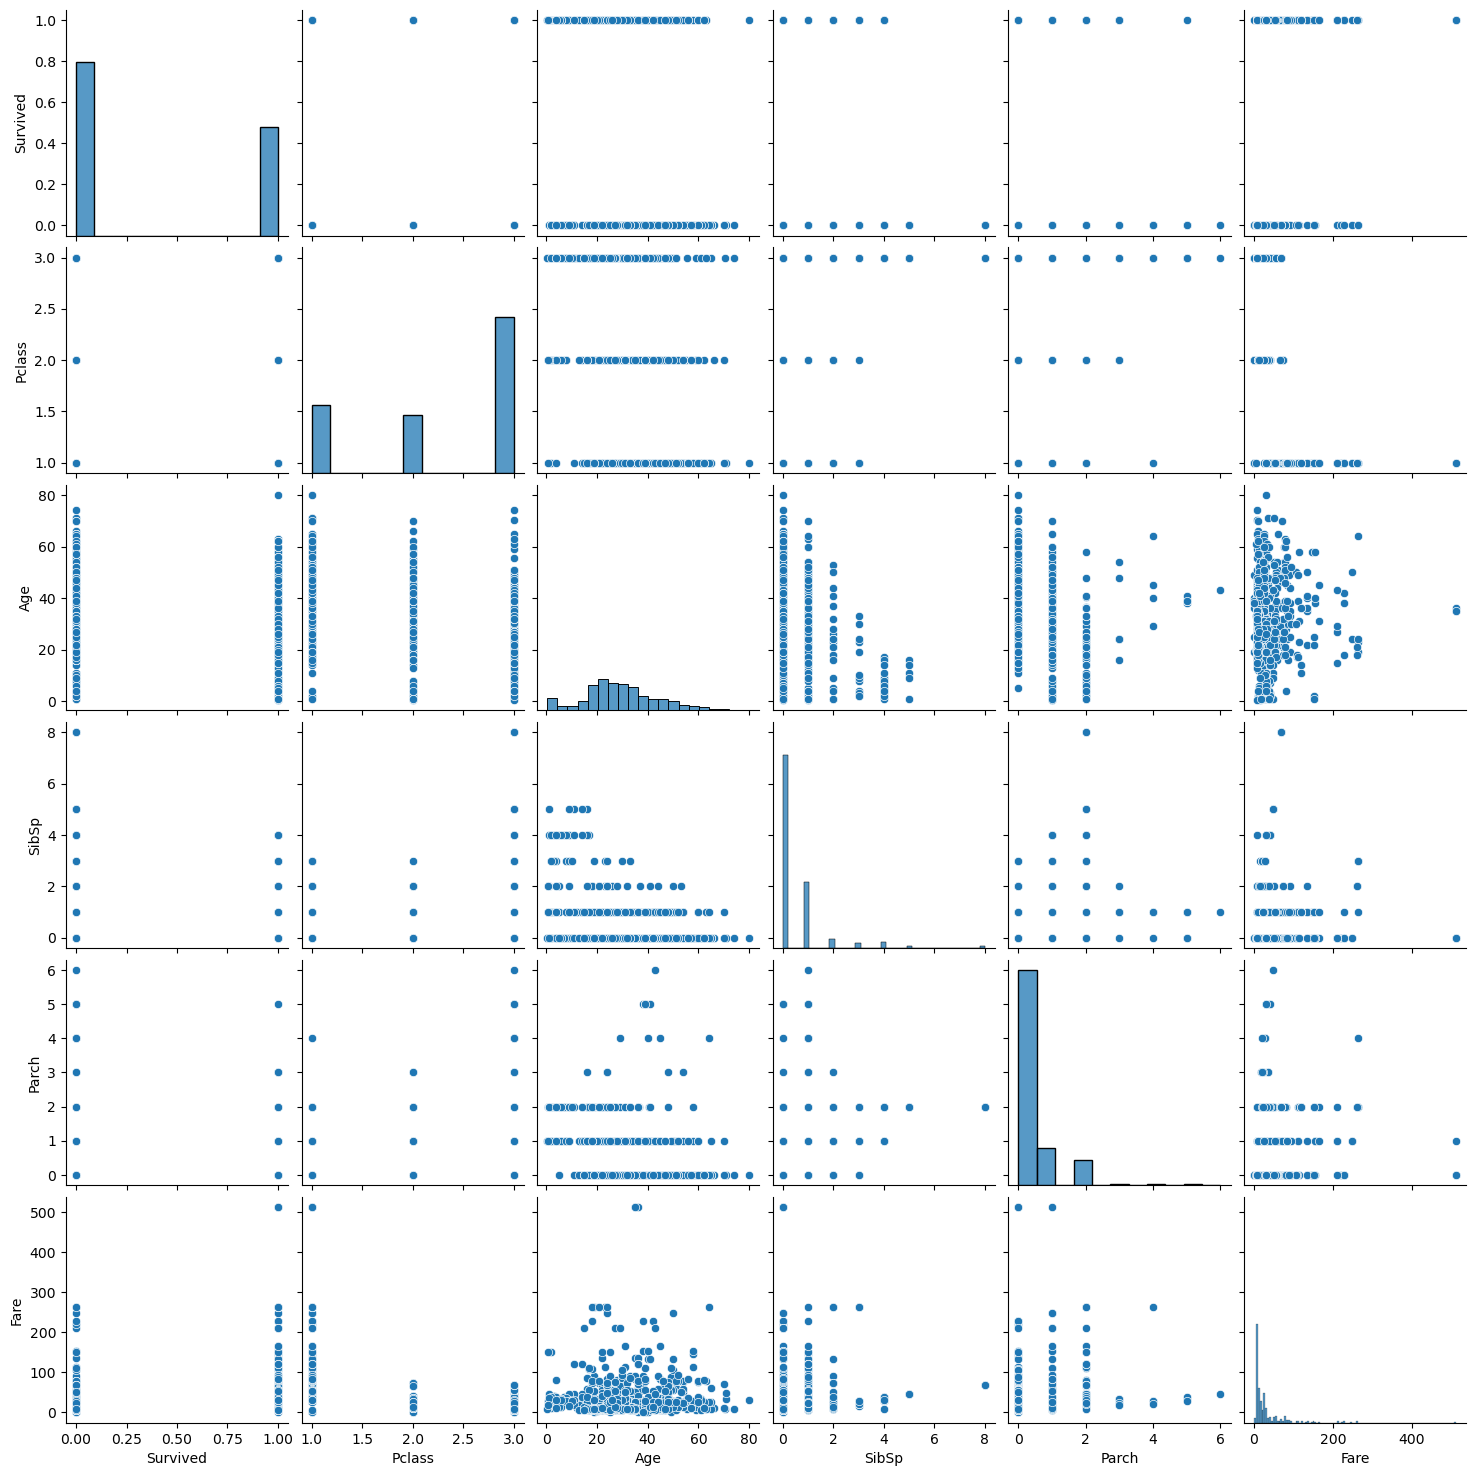

In [265]:
# Grafico bivariante de las variables

sns.pairplot(titanic)

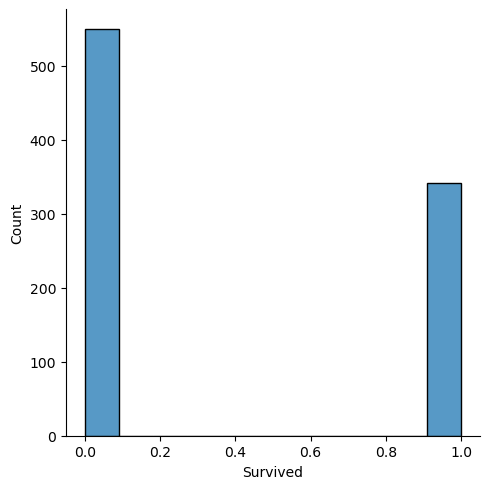

In [266]:
# Distribución variable Survived

sns.displot(titanic["Survived"])

<Axes: >

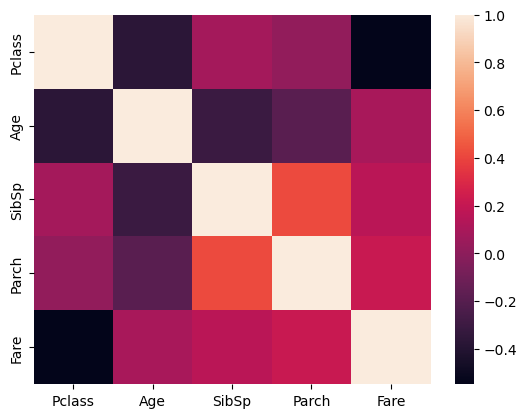

In [267]:
# Mapa de correalción de las variables numéricas

sns.heatmap(titanic[["Pclass","Age","SibSp","Parch","Fare"]].corr())

In [268]:
# Valores missing 

titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

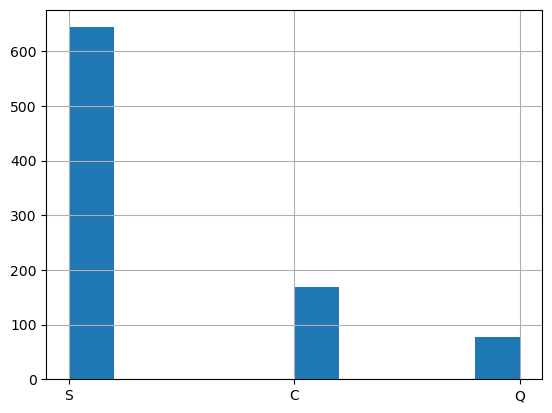

In [269]:
# El arbol d e decisión permite trabajar con missings. Eliminaremos la variabke Cabin, por ser categórica, y susitutimos en la vaiable embarked po la mas repetida.

titanic["Embarked"].hist()

In [270]:
titanic.fillna({"Embarked": "S"}, inplace=True)

In [271]:
# Eliminamos la variable Cabin

titanic.drop("Cabin",axis=1,inplace=True)

In [272]:
# Transformación de las variables categoicas 
sex= pd.get_dummies(titanic["Sex"],drop_first=True).astype(int)
embarked = pd.get_dummies(titanic["Embarked"],drop_first=True).astype(int)

In [273]:
# Juntamos la tabla para tener todos los datos numéricos y eliminamos la vaiable ticket por ser indiferente. Puesto que el arbol de decisión ha cambiado respecto a los valores NA, debemos eliminar los valores NA de la variable Age.
titanic.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)
titanic = pd.concat([titanic,sex,embarked],axis=1)
titanic = titanic.dropna(subset=["Age"])
titanic.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [274]:
# Preparación entrada modelo

X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123456789)

In [276]:
# Estimación del árbol de decisión

classif_tree = DecisionTreeClassifier(max_depth=5)
classif_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [295]:
# Obtenemos las predicciones como probabilidades o clases estimadas
classif_tree.predict_proba(X_test)

array([[0.11111111, 0.88888889],
       [0.58139535, 0.41860465],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.86708861, 0.13291139],
       [0.        , 1.        ],
       [0.46428571, 0.53571429],
       [0.        , 1.        ],
       [0.46428571, 0.53571429],
       [0.        , 1.        ],
       [0.86708861, 0.13291139],
       [0.9375    , 0.0625    ],
       [1.        , 0.        ],
       [0.58139535, 0.41860465],
       [0.        , 1.        ],
       [0.58139535, 0.41860465],
       [0.11111111, 0.88888889],
       [0.58139535, 0.41860465],
       [0.11111111, 0.88888889],
       [0.9375    , 0.0625    ],
       [0.58139535, 0.41860465],
       [0.86708861, 0.13291139],
       [0.17647059, 0.82352941],
       [0.86708861, 0.13291139],
       [1.        , 0.        ],
       [0.58139535, 0.41860465],
       [0.86708861, 0.13291139],
       [0.        , 1.        ],
       [0.86708861, 0.13291139],
       [0.

In [297]:
classif_tree.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

[Text(0.5151515151515151, 0.9166666666666666, 'male <= 0.5\ngini = 0.479\nsamples = 499\nvalue = [301, 198]'),
 Text(0.3106060606060606, 0.75, 'Pclass <= 2.5\ngini = 0.363\nsamples = 172\nvalue = [41, 131]'),
 Text(0.13636363636363635, 0.5833333333333334, 'Age <= 2.5\ngini = 0.137\nsamples = 108\nvalue = [8, 100]'),
 Text(0.06060606060606061, 0.4166666666666667, 'Fare <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.030303030303030304, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21212121212121213, 0.4166666666666667, 'Fare <= 28.856\ngini = 0.123\nsamples = 106\nvalue = [7, 99]'),
 Text(0.15151515151515152, 0.25, 'Fare <= 28.231\ngini = 0.227\nsamples = 46\nvalue = [6, 40]'),
 Text(0.12121212121212122, 0.08333333333333333, 'gini = 0.198\nsamples = 45\nvalue = [5, 40]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.272727272727272

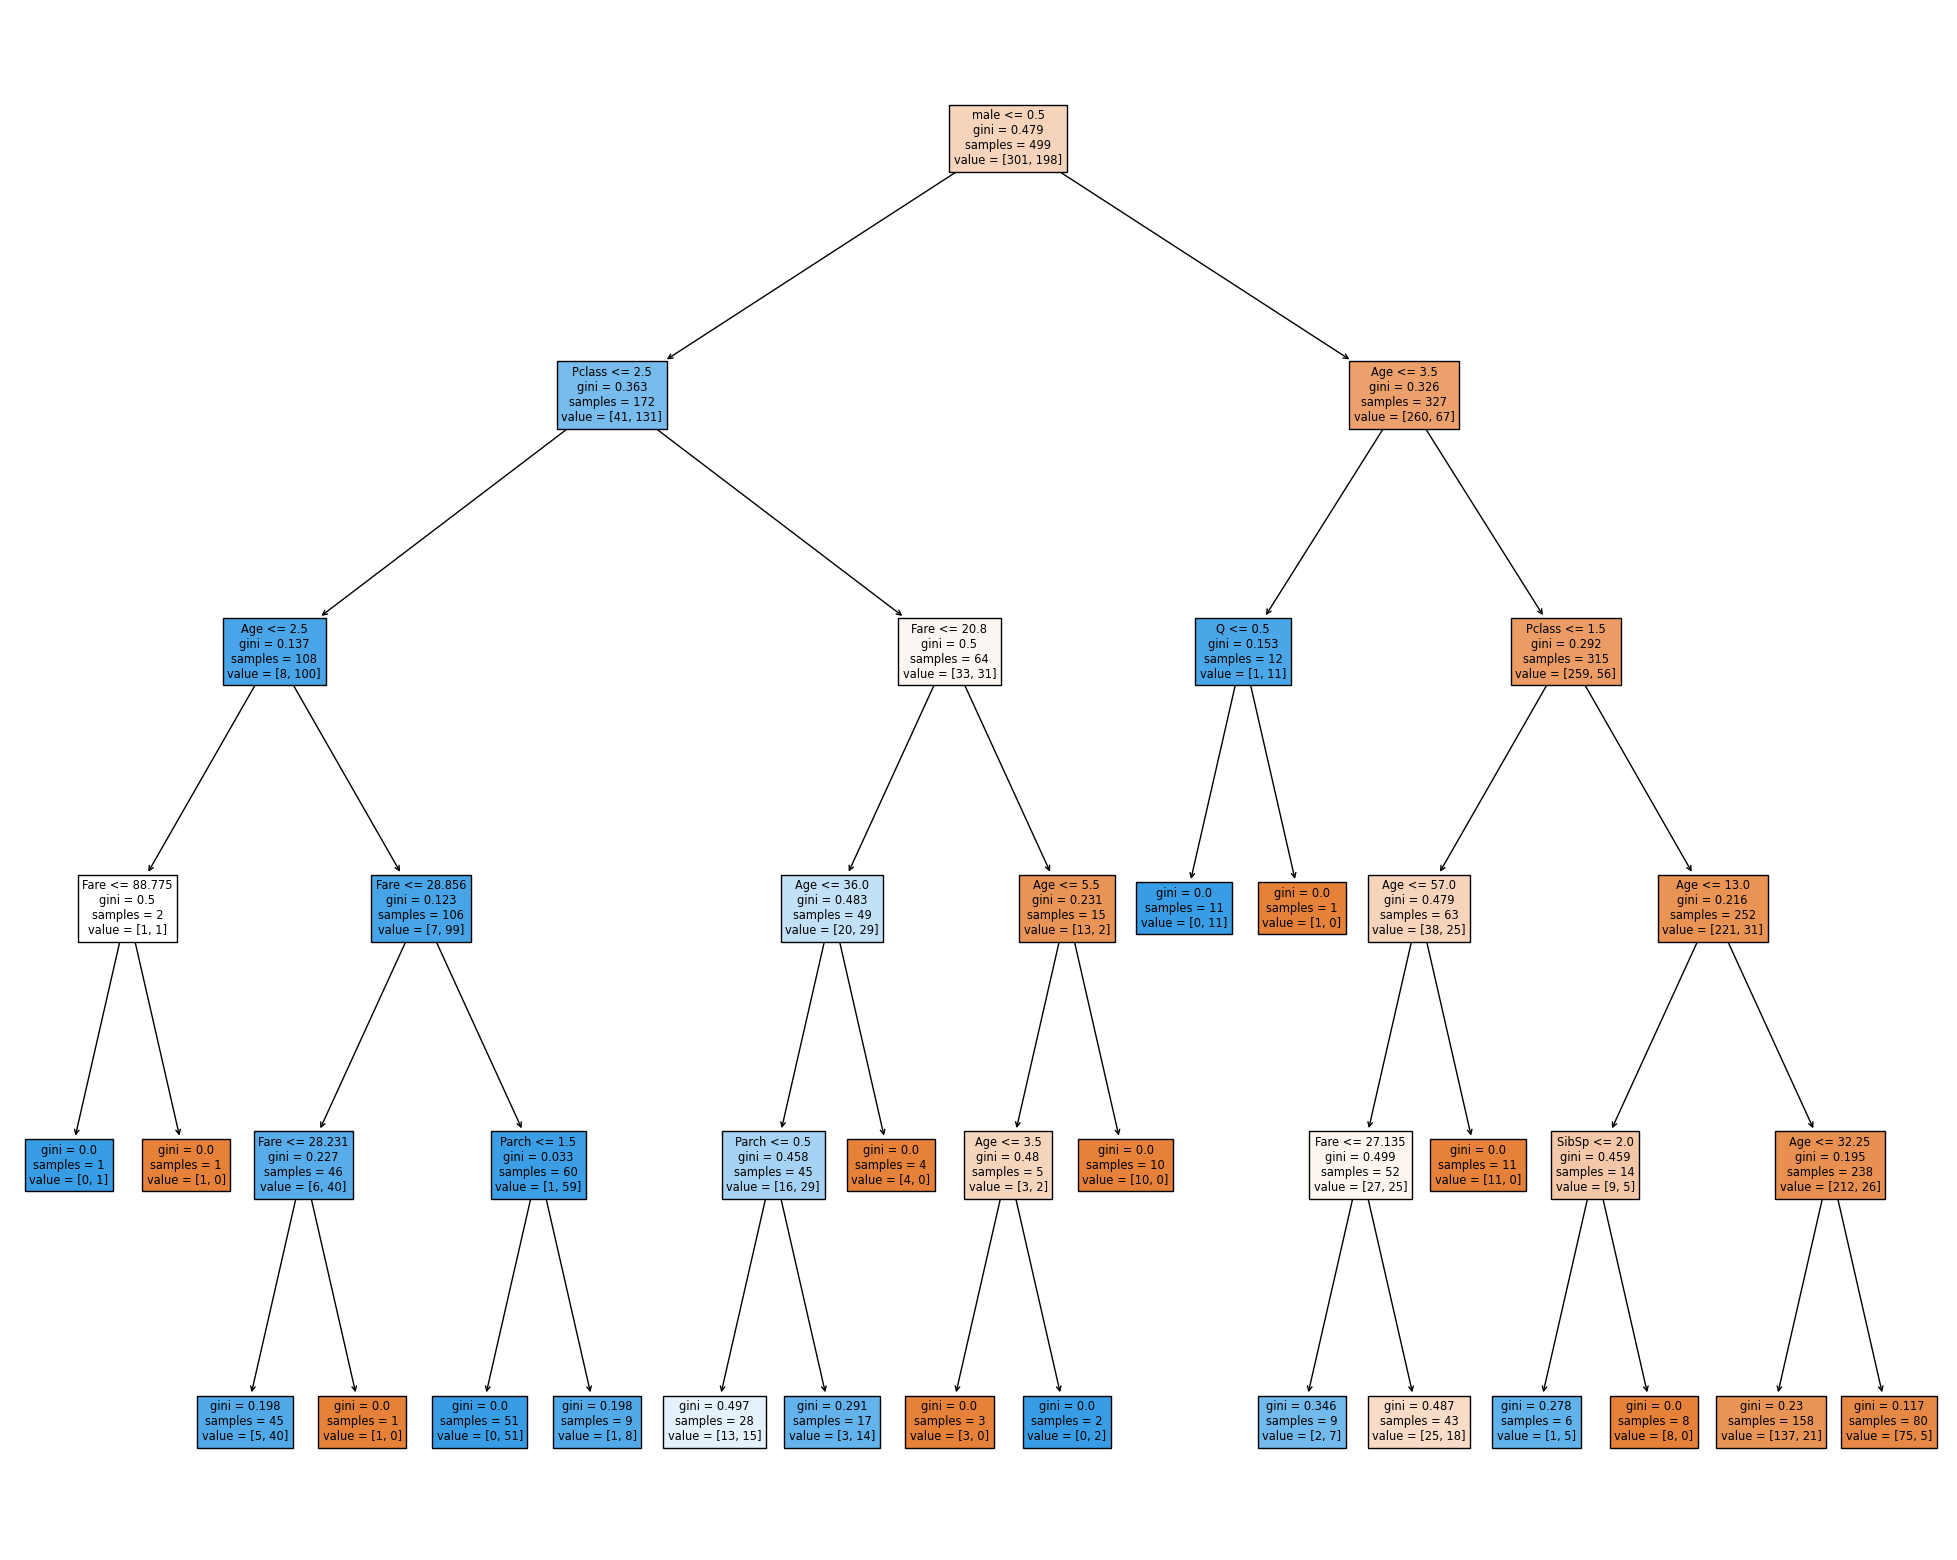

In [299]:
# Visualización del arbol de decisión

fig = plt.figure(figsize=(25,20))

tree.plot_tree(classif_tree, 
                    feature_names=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','male','Q','S'],  
                   filled=True)

In [303]:
# Evaluación del arbol de decisión

print(classification_report(y_test,classif_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       123
           1       0.75      0.76      0.76        92

    accuracy                           0.79       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.79      0.79      0.79       215



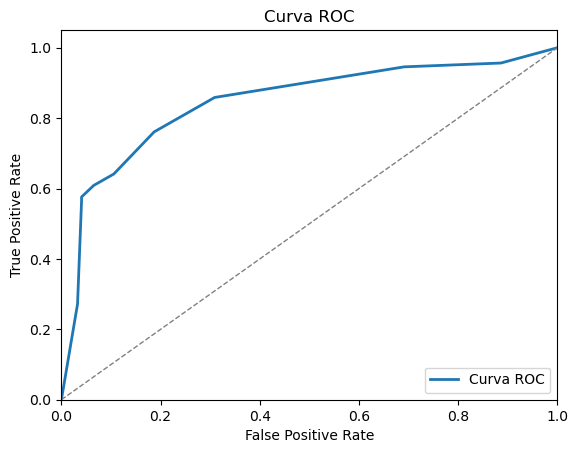

In [305]:
# Curva ROC
fpr,tpr,umbrales=roc_curve(y_test, classif_tree.predict_proba(X_test)[:,1], pos_label = 1)
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [309]:
# AUC
auc_1=auc(fpr, tpr)
auc_1

0.8450866030399435